In [5]:
import torch 
import torchvision 
from torch.utils.data import  DataLoader,datasets,Subset
from torchvision import transforms,datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import torchvision.models as models
import torchtext
from torchtext.data import get_tokenizer

In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.cuda.is_available()

True

In [7]:
test_triplets = pd.read_csv('./task4_be9ai3nsdj/test_triplets.txt',delimiter="\t",header=None)
train_triplets = pd.read_csv('./task4_be9ai3nsdj/train_triplets.txt',delimiter="\t",header=None)

In [9]:
transform = transforms.Compose([transforms.Scale((224,224)),
#                                 transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                     std=[0.229, 0.224, 0.225])])

dataset = datasets.ImageFolder('./task4_be9ai3nsdj/food/',transform = transform)

A:\Anaconda\envs\torch\lib\site-packages\torchvision\transforms\transforms.py:285: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


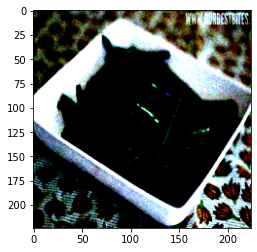

In [10]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=False)
images, labels = next(iter(dataloader))
plt.imshow(images[0].permute(1, 2, 0) )

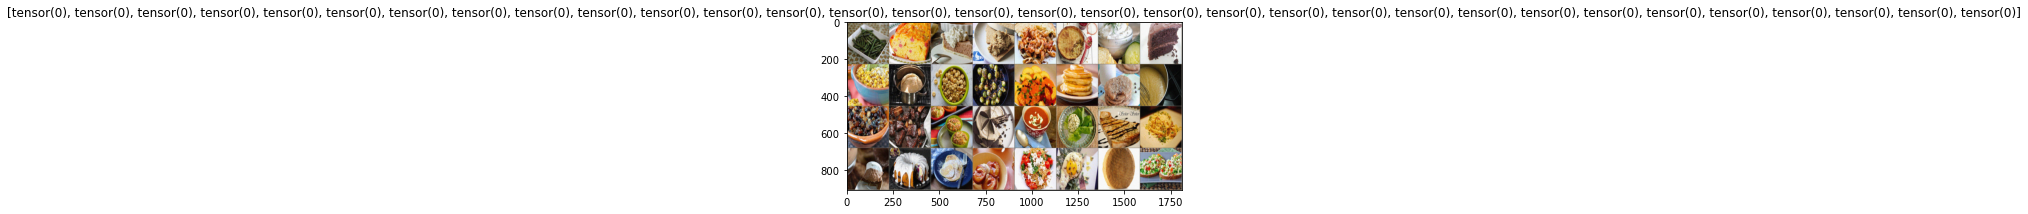

In [12]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
out = torchvision.utils.make_grid(images)

imshow(out, title=[labels[x] for x in labels])

In [19]:
dataset.imgs[0]

('./task4_be9ai3nsdj/food/food\\00000.jpg', 0)

In [25]:
f = open("train_", "w")
for i, (images, labels, samples_fname) in enumerate(dataloader, 0):
    outputs = model(images)
    pred = torch.max(outputs, 1)[1]
    f.write("\n".join([
        ", ".join(x)
        for x in zip(map(str, pred.cpu().tolist()), samples_fname)
    ]) + "\n")
f.close()

ValueError: not enough values to unpack (expected 3, got 2)